In [1]:
# Reading all necessary

import pandas as pd
import numpy as np
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly

In [2]:
# Reading the dataset
df=pd.read_csv('googleplaystore.csv',header=0)
df1=pd.read_csv('googleplaystore_user_reviews.csv',header=0)

In [3]:
print(df.shape)
print(df1.shape)

(10841, 13)
(64295, 5)


In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [6]:
df1.nunique()

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64

In [7]:
# Merge the datasets based on the 'App' column
merged_df = pd.merge(df, df1, on='App', how='left') # The how='left' parameter specifies a left join, which retains all the rows from the first dataset (df) and includes matching rows from the second dataset (df1).


In [8]:
merged_df.shape

(131971, 17)

In [9]:
merged_df.duplicated().sum()

81293

In [10]:
# Drop duplicate rows
data = merged_df.drop_duplicates(inplace=True)


In [11]:
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131966,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN,NaN
131967,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,NaN,NaN,NaN,NaN
131968,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,NaN,NaN,NaN,NaN
131969,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [12]:
merged_df.duplicated().sum()

0

In [13]:
# Checking the shape of the data
merged_df.shape

(50678, 17)

In [14]:
merged_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
73541,Gyft - Mobile Gift Card Wallet,SHOPPING,4.1,9701,14M,"500,000+",Free,0,Everyone,Shopping,"July 25, 2018",2.4.0,4.4 and up,Buy gyft card put security WITHOUT reason. I'v...,Negative,-0.223958,0.601042
89698,Amtrak,TRAVEL_AND_LOCAL,3.7,16815,28M,"1,000,000+",Free,0,Everyone,Travel & Local,"July 15, 2018",3.1.3,5.0 and up,This missing ability put train number see stat...,Negative,-0.200000,0.050000
28231,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873516,Varies with device,"50,000,000+",Free,0,Everyone,Health & Fitness,"July 31, 2018",Varies with device,Varies with device,Bloated ads useless information fitness.,Negative,-0.500000,0.200000
93237,HTC Sense Input,TOOLS,3.4,17030,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"May 12, 2017",Varies with device,Varies with device,Is way change long press buttons? If I want en...,Neutral,0.000000,0.600000
65501,DC Super Hero Girls™,FAMILY,4.3,43060,95M,"5,000,000+",Free,0,Everyone,Action;Action & Adventure,"June 29, 2018",2.8.0,4.0 and up,This best games problem music game working I l...,Positive,0.325000,0.375000


### Descriptive Statistics

In [15]:
merged_df.describe()# to get the summary stats

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,49175.000000,40422.000000,40422.000000
mean,4.300360,0.168339,0.495081
std,0.351247,0.343402,0.250631
min,1.000000,-1.000000,0.000000
25%,4.200000,0.000000,0.373333
50%,4.400000,0.136364,0.512971
75%,4.500000,0.389983,0.646429
max,19.000000,1.000000,1.000000


### VISUALIZATION 

<AxesSubplot:ylabel='Sentiment'>

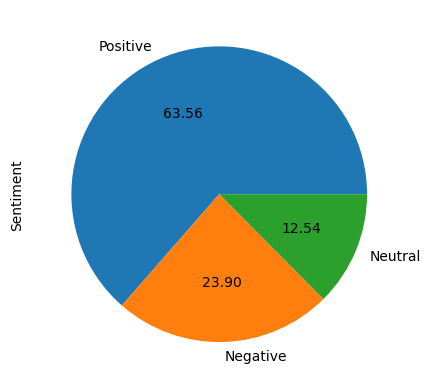

In [16]:
#code snippet creates a pie chart to visualize the distribution of a categorical variable 'Sentiment' in the dataframe
merged_df['Sentiment'].value_counts().plot(kind="pie",autopct="%0.2f")

<AxesSubplot:ylabel='Content Rating'>

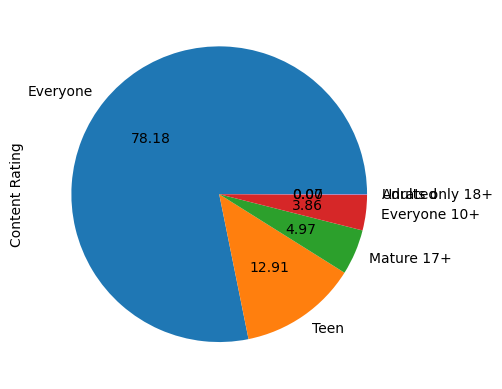

In [17]:
#code snippet creates a pie chart to visualize the distribution of a categorical variable 'Content Rating' in the dataframe
merged_df['Content Rating'].value_counts().plot(kind="pie",autopct="%0.2f")

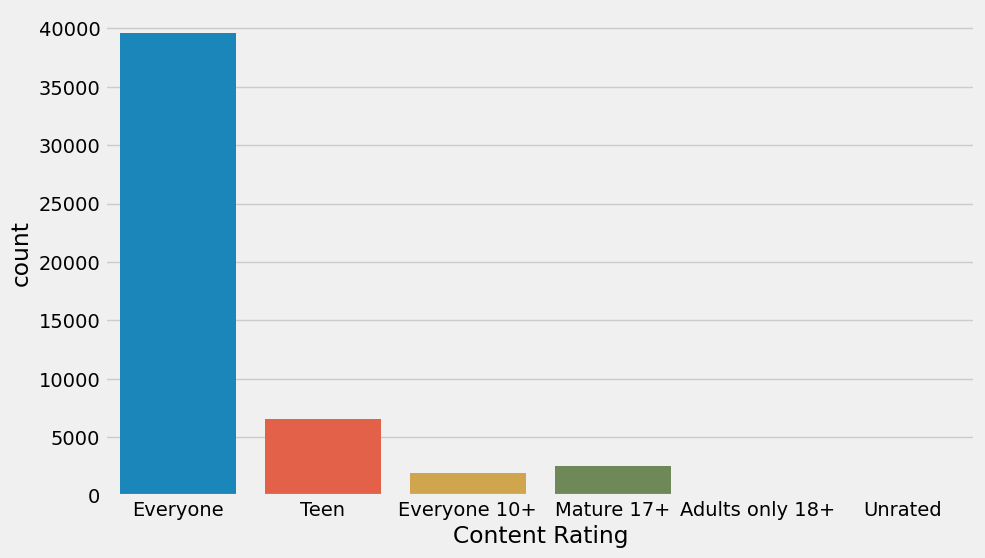

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='Content Rating', data=merged_df)

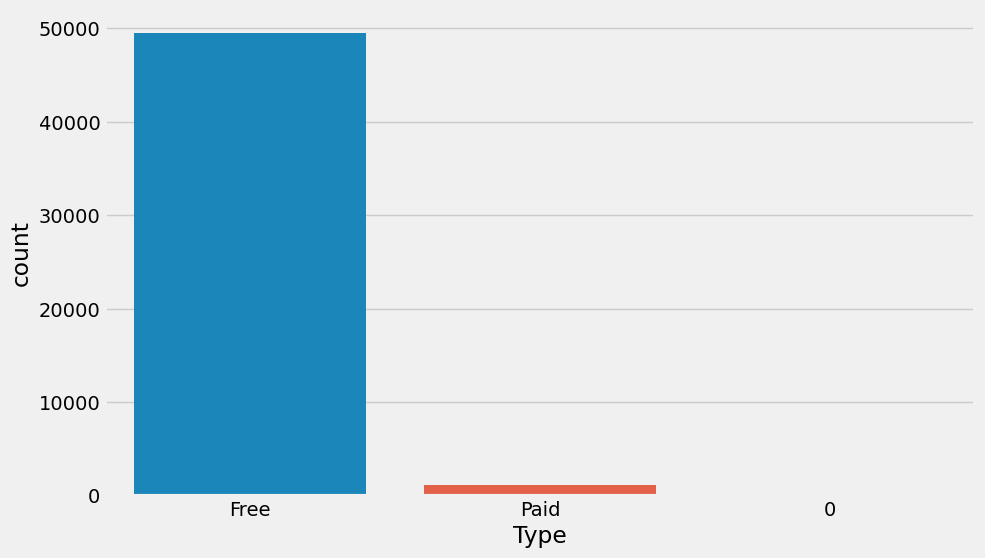

In [19]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='Type', data=merged_df)

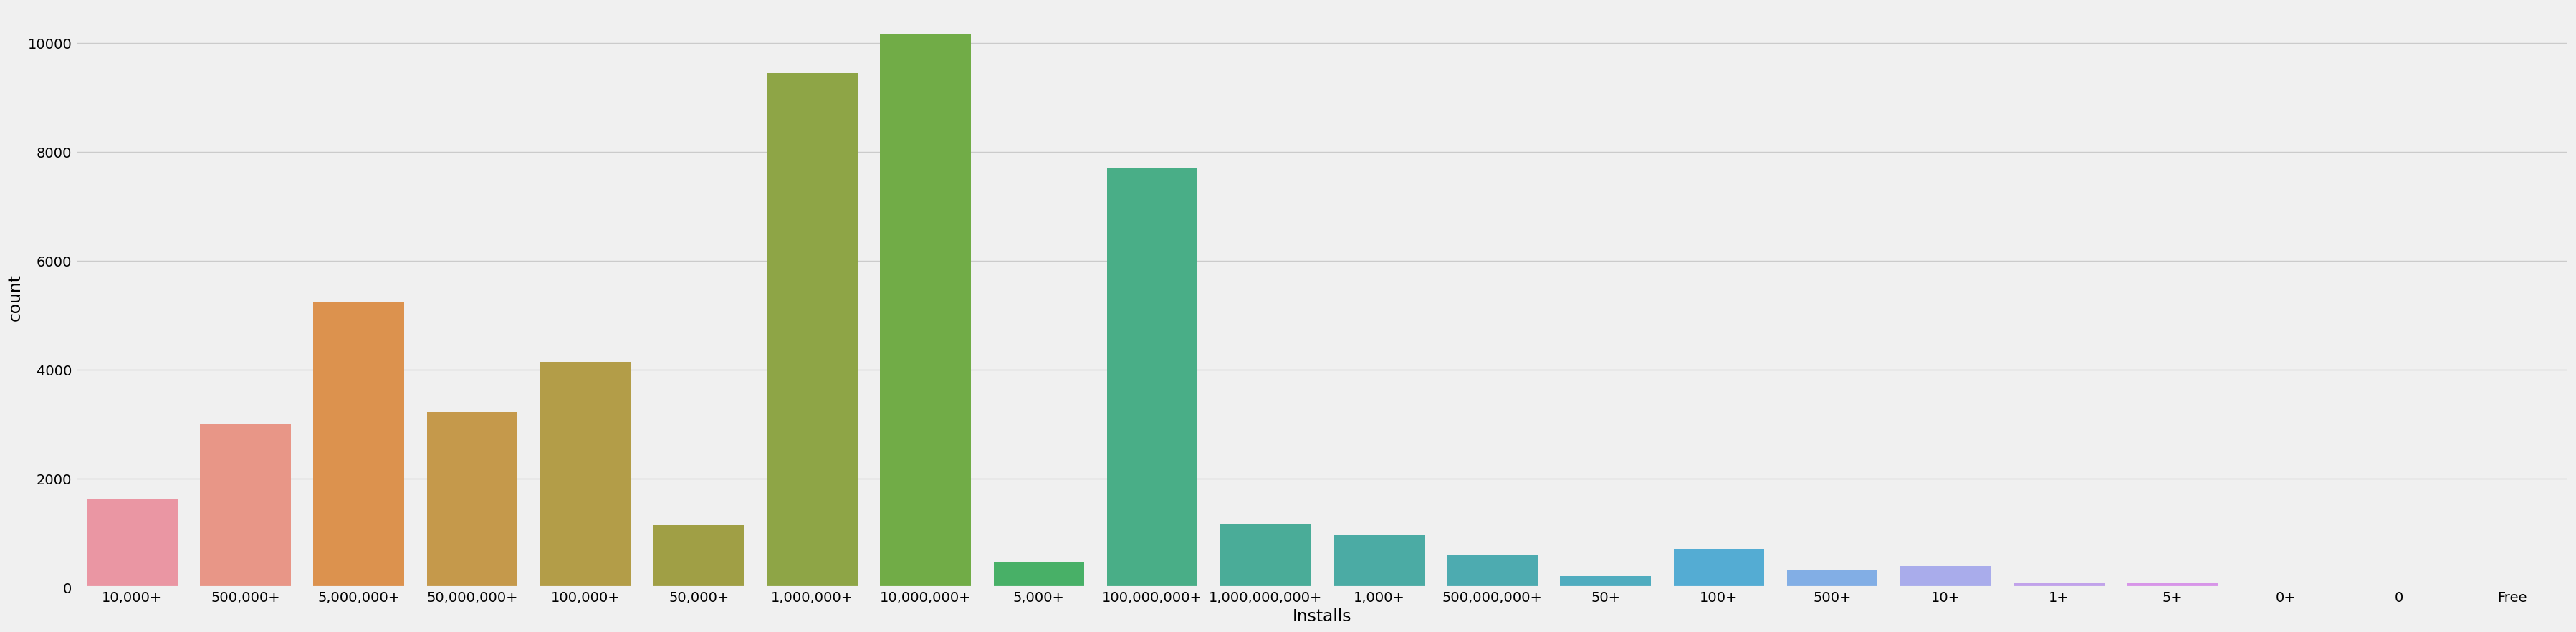

In [20]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(40,10))
ax = sns.countplot(x='Installs', data=merged_df)

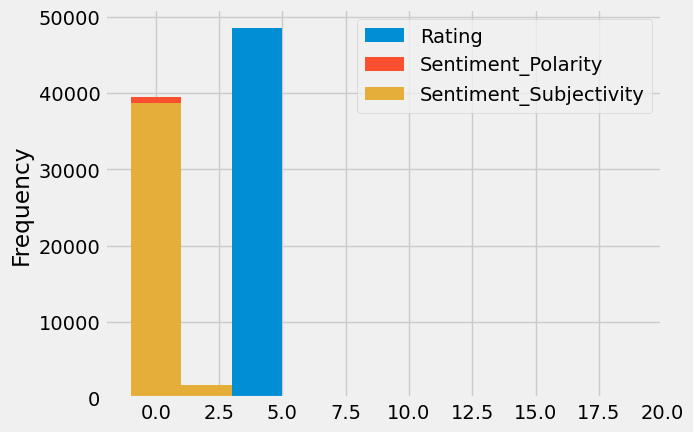

In [21]:
merged_df.plot(kind='hist')
plt.show()

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Sentiment_Polarity'}>],
       [<AxesSubplot:title={'center':'Sentiment_Subjectivity'}>,
        <AxesSubplot:>]], dtype=object)

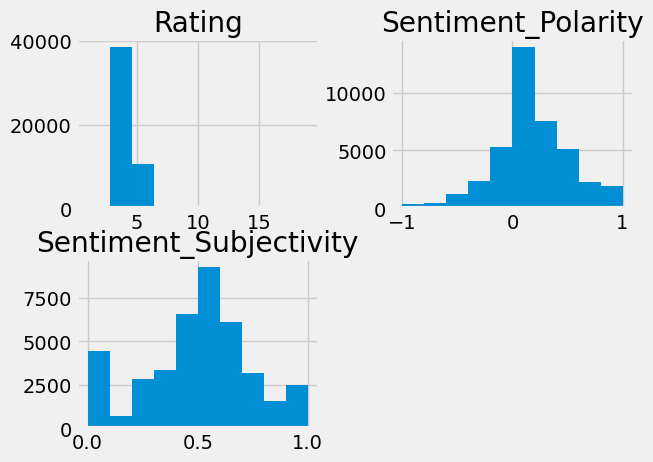

In [22]:
merged_df.hist()

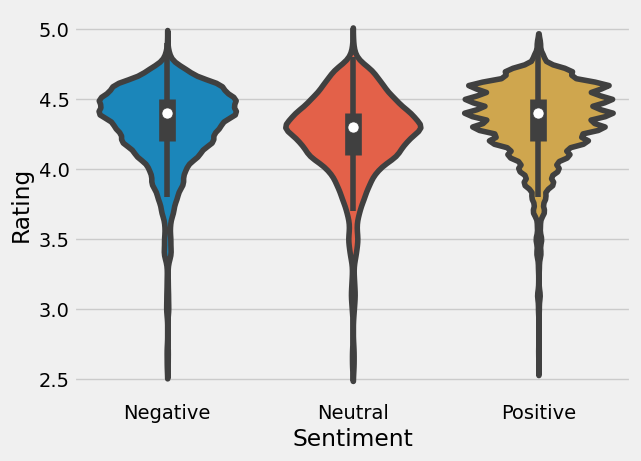

In [23]:
ax = sns.violinplot(x=merged_df['Sentiment'], y=merged_df['Rating'])

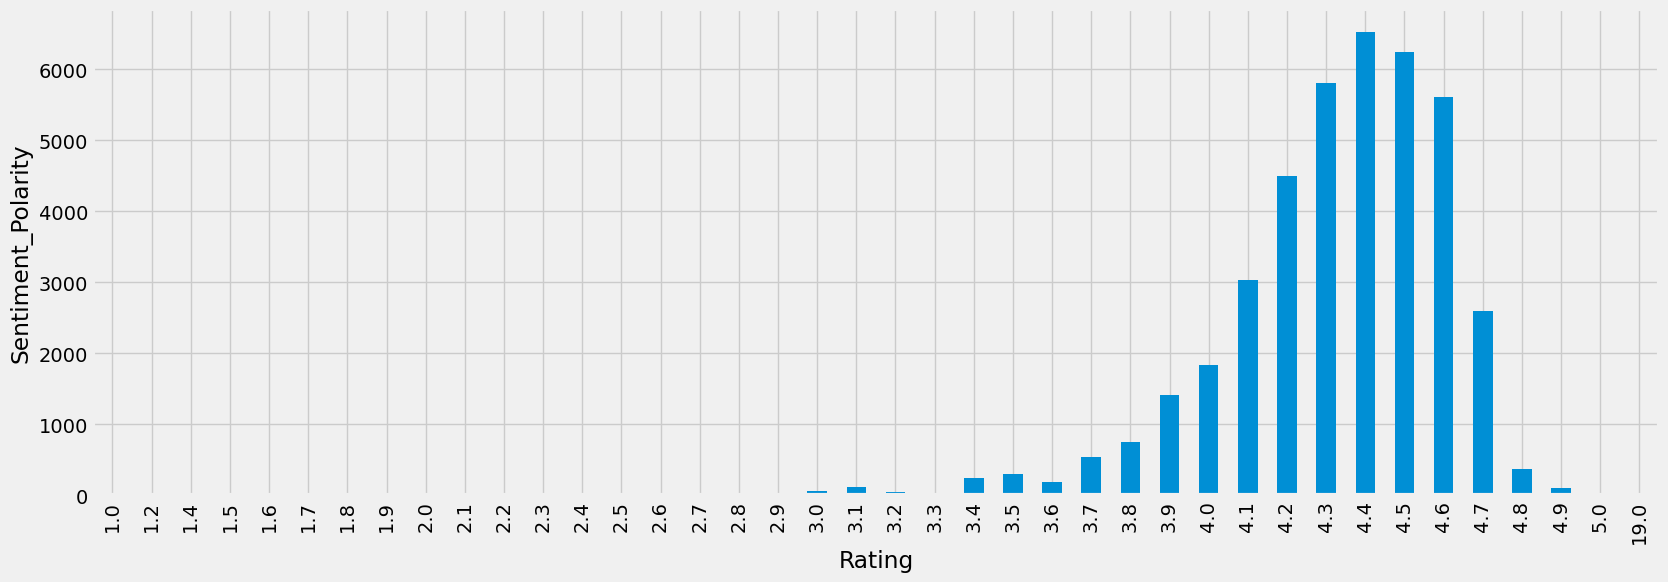

In [24]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = merged_df.groupby('Rating').Sentiment_Polarity.count().plot.bar(ylim=0)
ax.set_ylabel('Sentiment_Polarity')
plt.show()

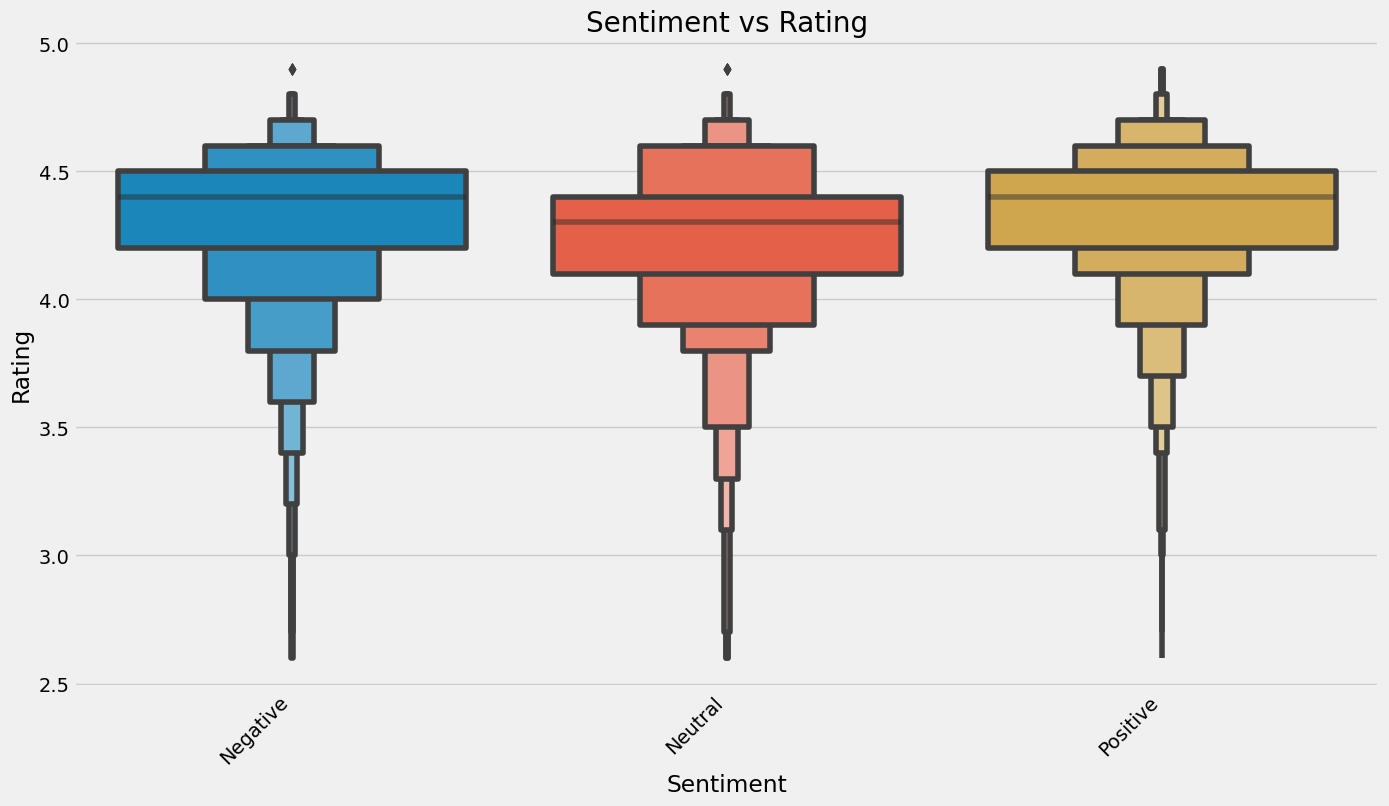

In [25]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data=merged_df, x='Sentiment', y='Rating')
plt.title('Sentiment vs Rating', fontsize=20)
plt.xticks(rotation=45, ha='right')  # set the x-axis tick labels
plt.show()

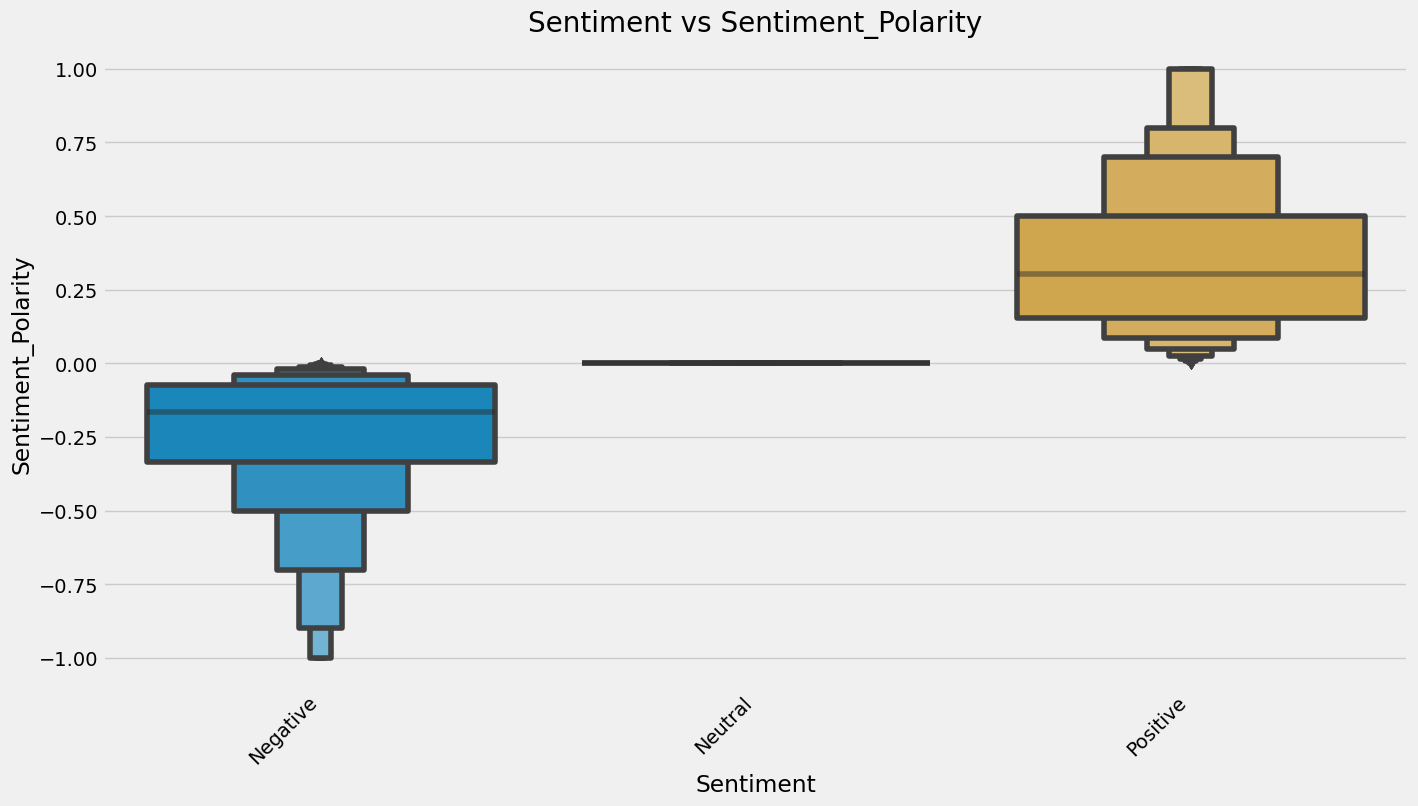

In [26]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data=merged_df, x='Sentiment', y='Sentiment_Polarity')
plt.title('Sentiment vs Sentiment_Polarity', fontsize=20)
plt.xticks(rotation=45, ha='right')  # set the x-axis tick labels
plt.show()

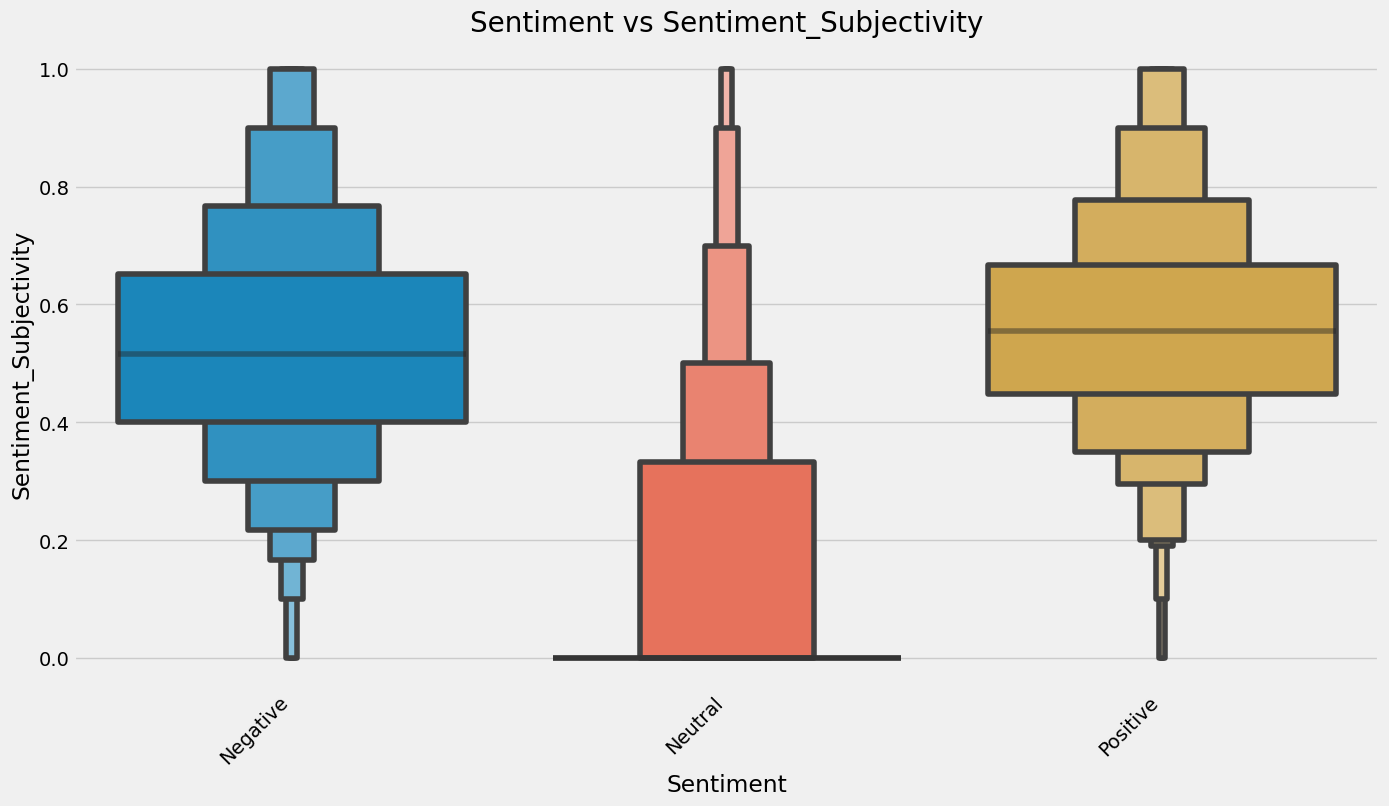

In [27]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data=merged_df, x='Sentiment', y='Sentiment_Subjectivity')
plt.title('Sentiment vs Sentiment_Subjectivity', fontsize=20)
plt.xticks(rotation=45, ha='right')  # set the x-axis tick labels
plt.show()

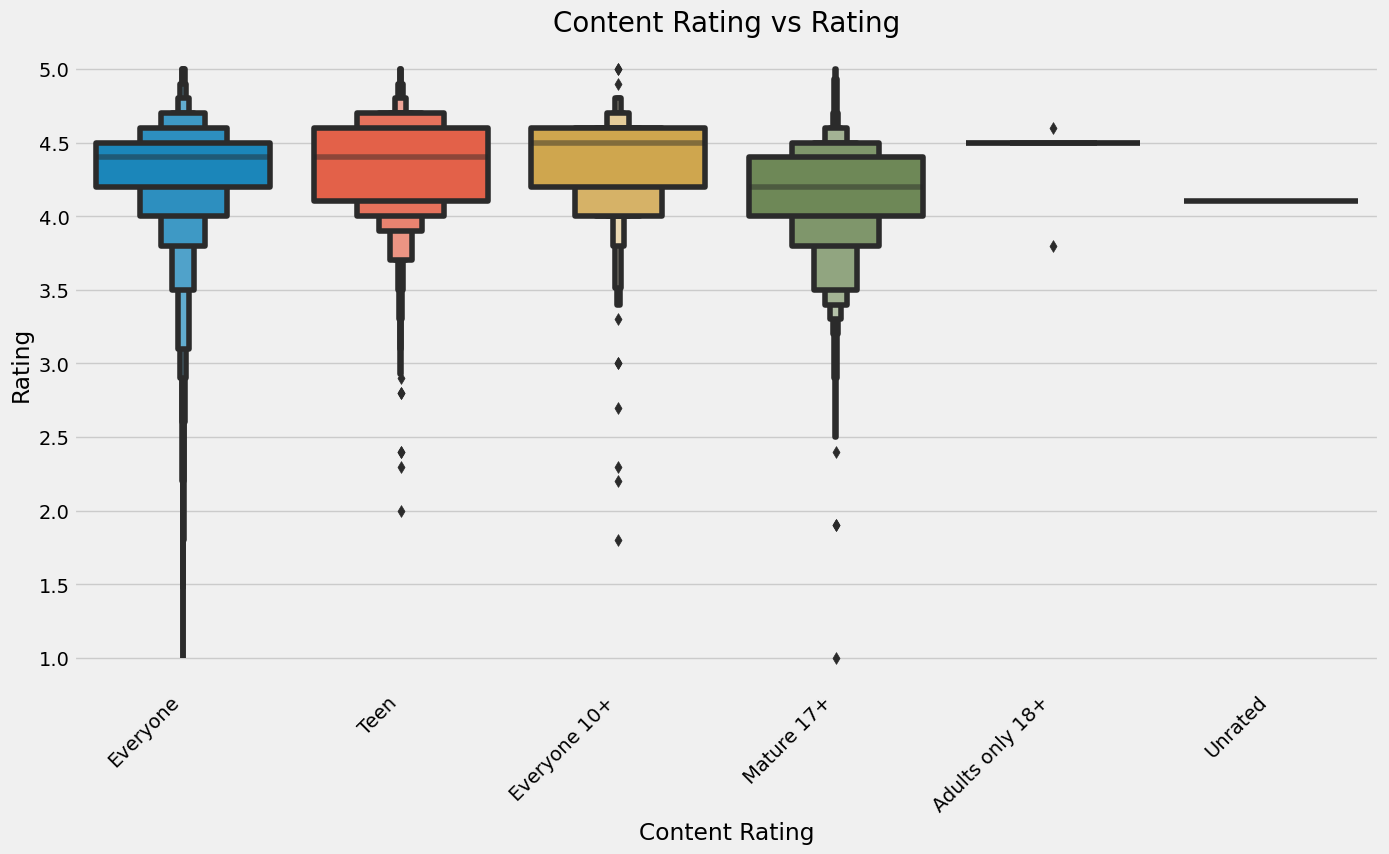

In [28]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data=merged_df, x='Content Rating', y='Rating')
plt.title('Content Rating vs Rating', fontsize=20)
plt.xticks(rotation=45, ha='right')  # set the x-axis tick labels
plt.show()

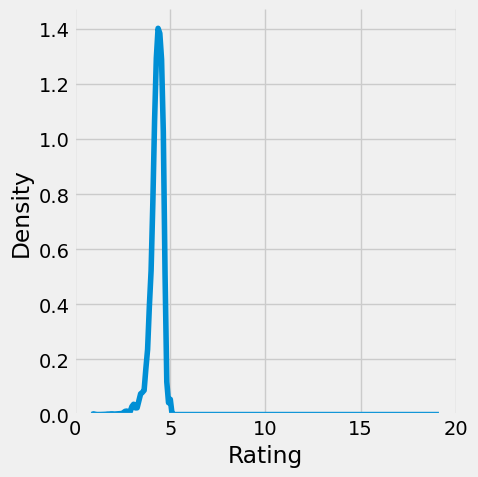

In [29]:
plt.style.use('fivethirtyeight')
sns.displot(data = merged_df , x = 'Rating' , kind = 'kde', palette = 'PuRd')

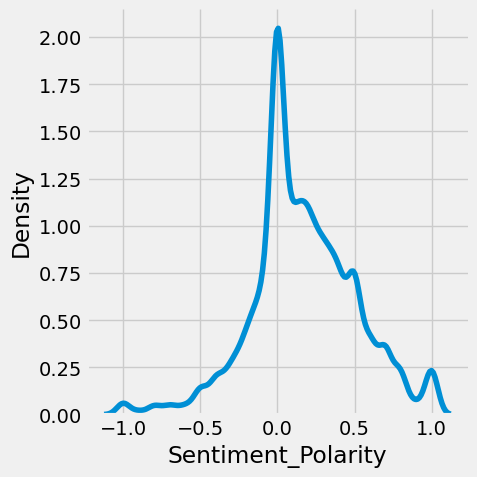

In [30]:
plt.style.use('fivethirtyeight')
sns.displot(data = merged_df , x = 'Sentiment_Polarity' , kind = 'kde', palette = 'PuRd')

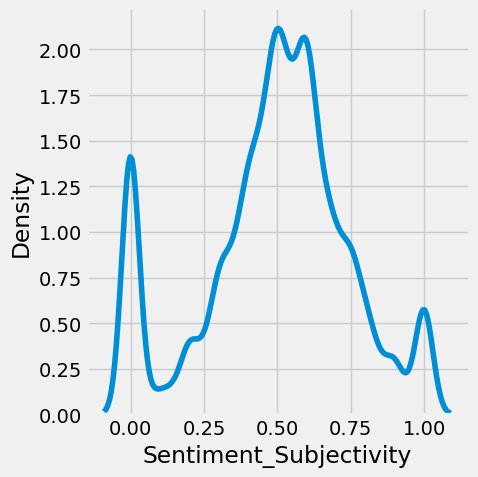

In [31]:
plt.style.use('fivethirtyeight')
sns.displot(data = merged_df , x = 'Sentiment_Subjectivity' , kind = 'kde', palette = 'PuRd')

Text(0.5, 1.0, 'Distribution of Rating')

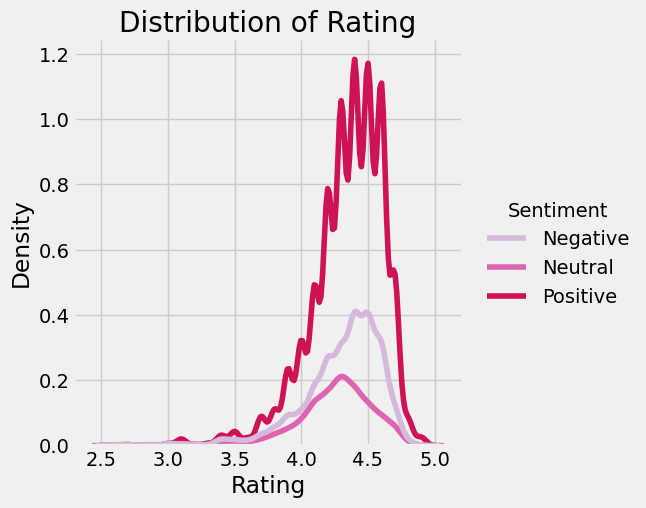

In [32]:
plt.style.use('fivethirtyeight')
sns.displot(data = merged_df , x = 'Rating' , kind = 'kde' , hue = 'Sentiment' ,palette = 'PuRd')
plt.title('Distribution of Rating')

### Data Preprocessing

In [35]:
#Unique Values
merged_df.nunique()

App                        9660
Category                     34
Rating                       40
Reviews                    6002
Size                        462
Installs                     22
Type                          3
Price                        93
Content Rating                6
Genres                      120
Last Updated               1378
Current Ver                2832
Android Ver                  33
Translated_Review         26682
Sentiment                     3
Sentiment_Polarity         5295
Sentiment_Subjectivity     4382
dtype: int64

In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50678 entries, 0 to 131970
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     50678 non-null  object 
 1   Category                50678 non-null  object 
 2   Rating                  49175 non-null  float64
 3   Reviews                 50678 non-null  object 
 4   Size                    50678 non-null  object 
 5   Installs                50678 non-null  object 
 6   Type                    50677 non-null  object 
 7   Price                   50678 non-null  object 
 8   Content Rating          50677 non-null  object 
 9   Genres                  50678 non-null  object 
 10  Last Updated            50678 non-null  object 
 11  Current Ver             50670 non-null  object 
 12  Android Ver             50675 non-null  object 
 13  Translated_Review       40414 non-null  object 
 14  Sentiment               40422 non-nul

In [37]:
#checking the missing values
merged_df.isnull().sum()

App                           0
Category                      0
Rating                     1503
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                1
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   3
Translated_Review         10264
Sentiment                 10256
Sentiment_Polarity        10256
Sentiment_Subjectivity    10256
dtype: int64

<AxesSubplot:>

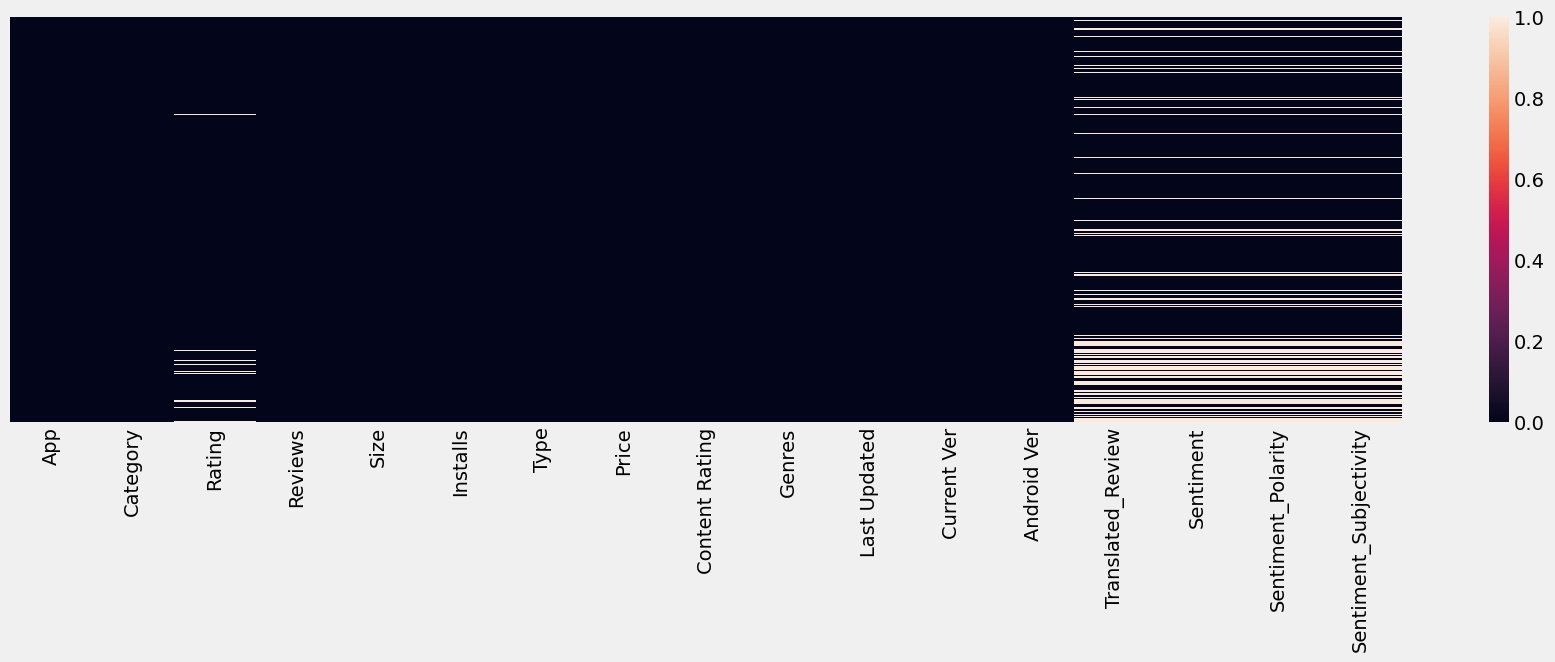

In [38]:
# Plotting a heat map to check null values in each column of train data
plt.figure(figsize=(20,5))
sns.heatmap(merged_df.isnull(),yticklabels= False)

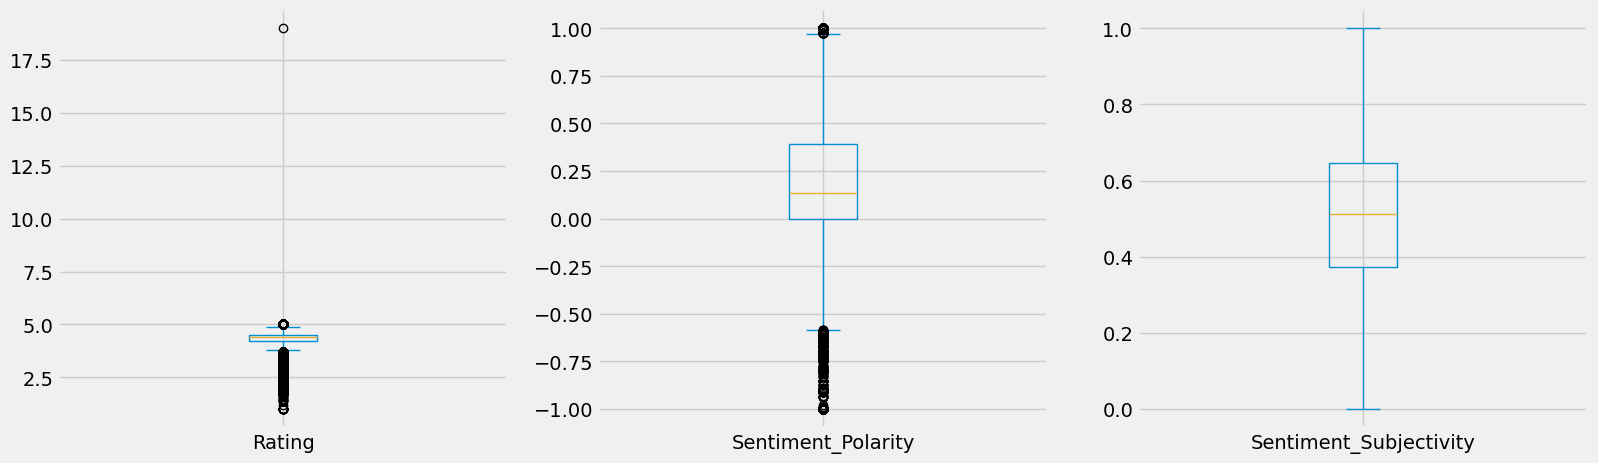

In [39]:
#to plot the outliers in the dataset
import matplotlib.pyplot as plt
merged_df.plot(kind='box',subplots=True,layout=(5,5),figsize=(30,30))
plt.show()

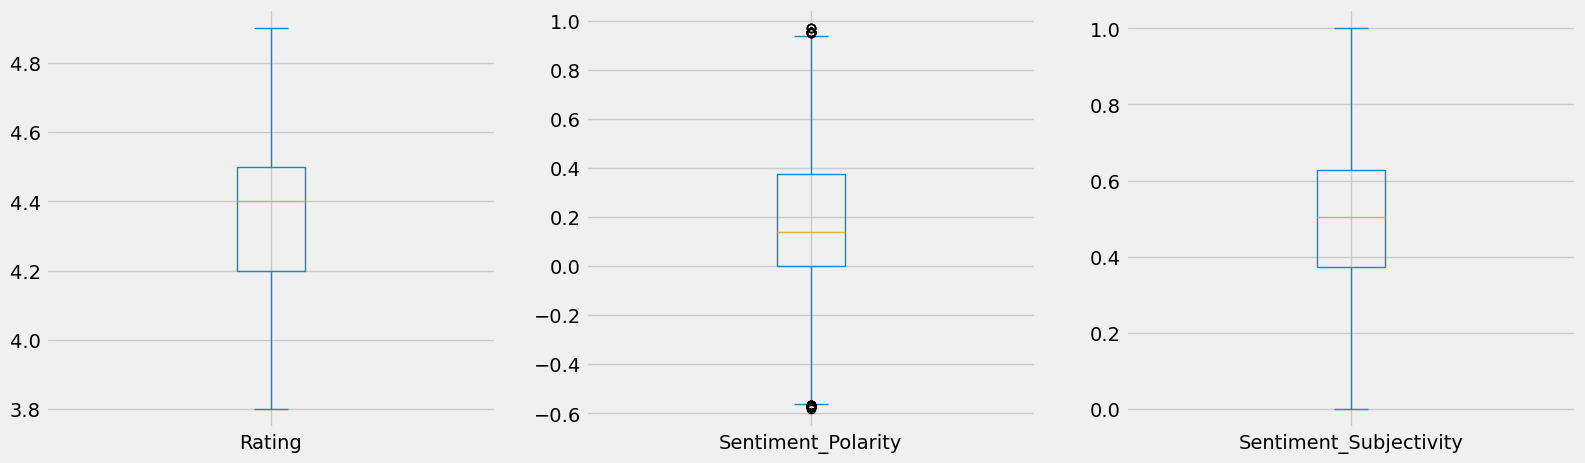

In [40]:
###After removing Outliers in the dataset
cols = ["Rating","Sentiment_Polarity"]

Q1 = merged_df[cols].quantile(0.25)
Q3 = merged_df[cols].quantile(0.75)

IQR = Q3 - Q1

merged_df_box = merged_df[~((merged_df[cols] < (Q1 - 1.5 * IQR)) |(merged_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
merged_df_box.plot(kind='box',subplots=True,layout=(5,5),figsize=(30,30))
plt.show()

In [41]:
# missing value treatment using median for data
median_Sentiment_Polarity= merged_df['Sentiment_Polarity'].median()
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].fillna(median_Sentiment_Polarity)

In [42]:
# missing value treatment using mean for data
mean_Sentiment_Subjectivity= merged_df['Sentiment_Subjectivity'].mean()
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].fillna(mean_Sentiment_Subjectivity)

In [43]:
# missing value treatment using mean for data
mean_Rating= merged_df['Rating'].mean()
merged_df['Rating'] = merged_df['Rating'].fillna(mean_Rating)

In [44]:
# Impute missing values in train data with mode
cols_to_impute = ['Translated_Review', 'Sentiment']
for col in cols_to_impute:
    if merged_df[col].dtype == 'O': # check if column is categorical
        mode_col = merged_df[col].mode()[0] # calculate mode of column
        merged_df[col].fillna(mode_col, inplace=True) # replace missing values with mode

# Check for missing values after imputation
print(merged_df.isnull().sum())

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      1
Price                     0
Content Rating            1
Genres                    0
Last Updated              0
Current Ver               8
Android Ver               3
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


<AxesSubplot:>

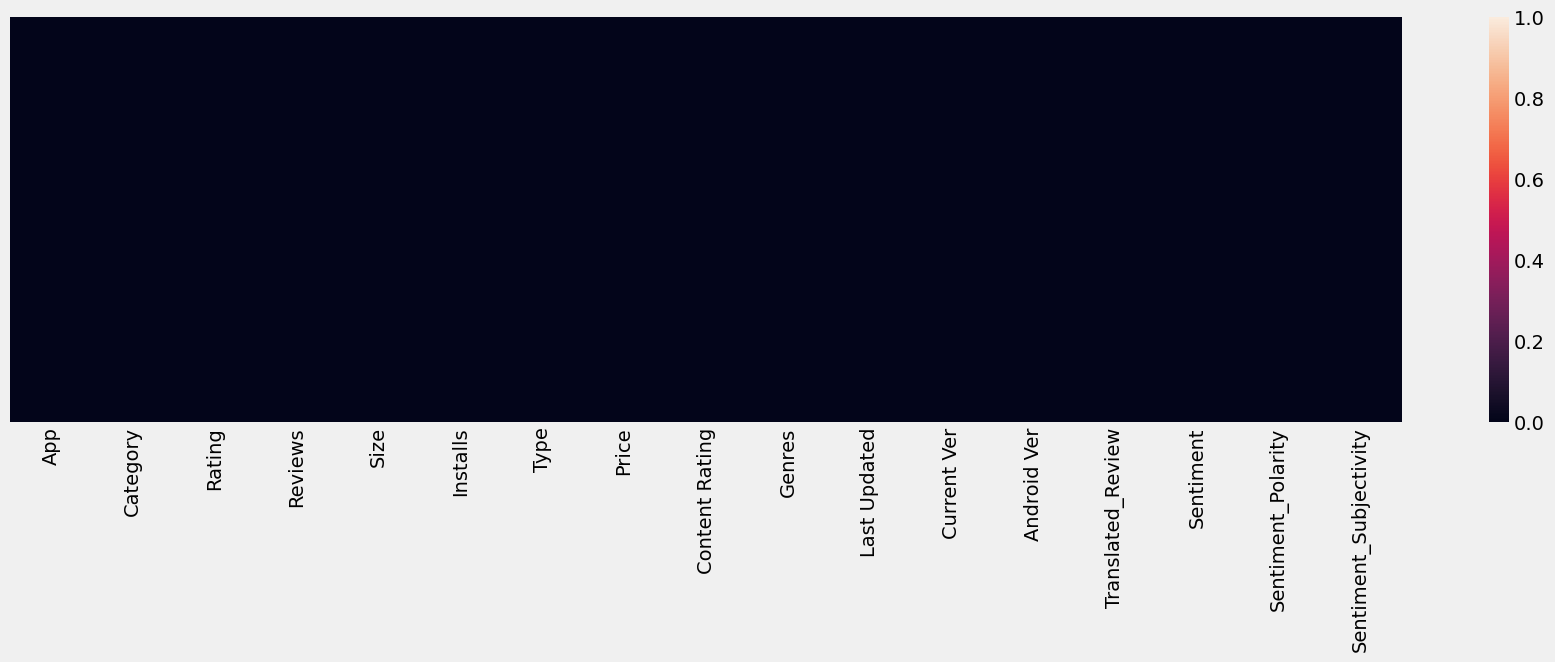

In [45]:
# Plotting a heat map to check null values in each column of train data
plt.figure(figsize=(20,5))
sns.heatmap(merged_df.isnull(),yticklabels= False)

In [46]:
#code snippet selects all the columns in the 'merged_df' dataframe where the data type is 'object' and assigns them to a variable 'col' in train.
col = merged_df.columns[merged_df.dtypes=="object"]

In [47]:
#categorical column shape
col.shape

(14,)

In [48]:
#code snippet uses the LabelEncoder class from the sklearn.preprocessing module to convert categorical variables to numeric format.
from sklearn.preprocessing import LabelEncoder
for i in col:
    le = LabelEncoder()
    merged_df[i] = le.fit_transform(merged_df[i])

In [49]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,6963,1,4.1,1182,54,7,1,91,1,9,561,118,15,4957,2,0.136364,0.495081
1,2632,1,3.9,5923,28,19,1,91,1,12,481,1018,15,324,0,-0.250000,1.000000
2,2632,1,3.9,5923,28,19,1,91,1,12,481,1018,15,11865,0,-0.725000,0.833333
3,2632,1,3.9,5923,28,19,1,91,1,12,481,1018,15,26194,1,0.000000,0.000000
4,2632,1,3.9,5923,28,19,1,91,1,12,481,1018,15,4957,2,0.136364,0.495081


<AxesSubplot:>

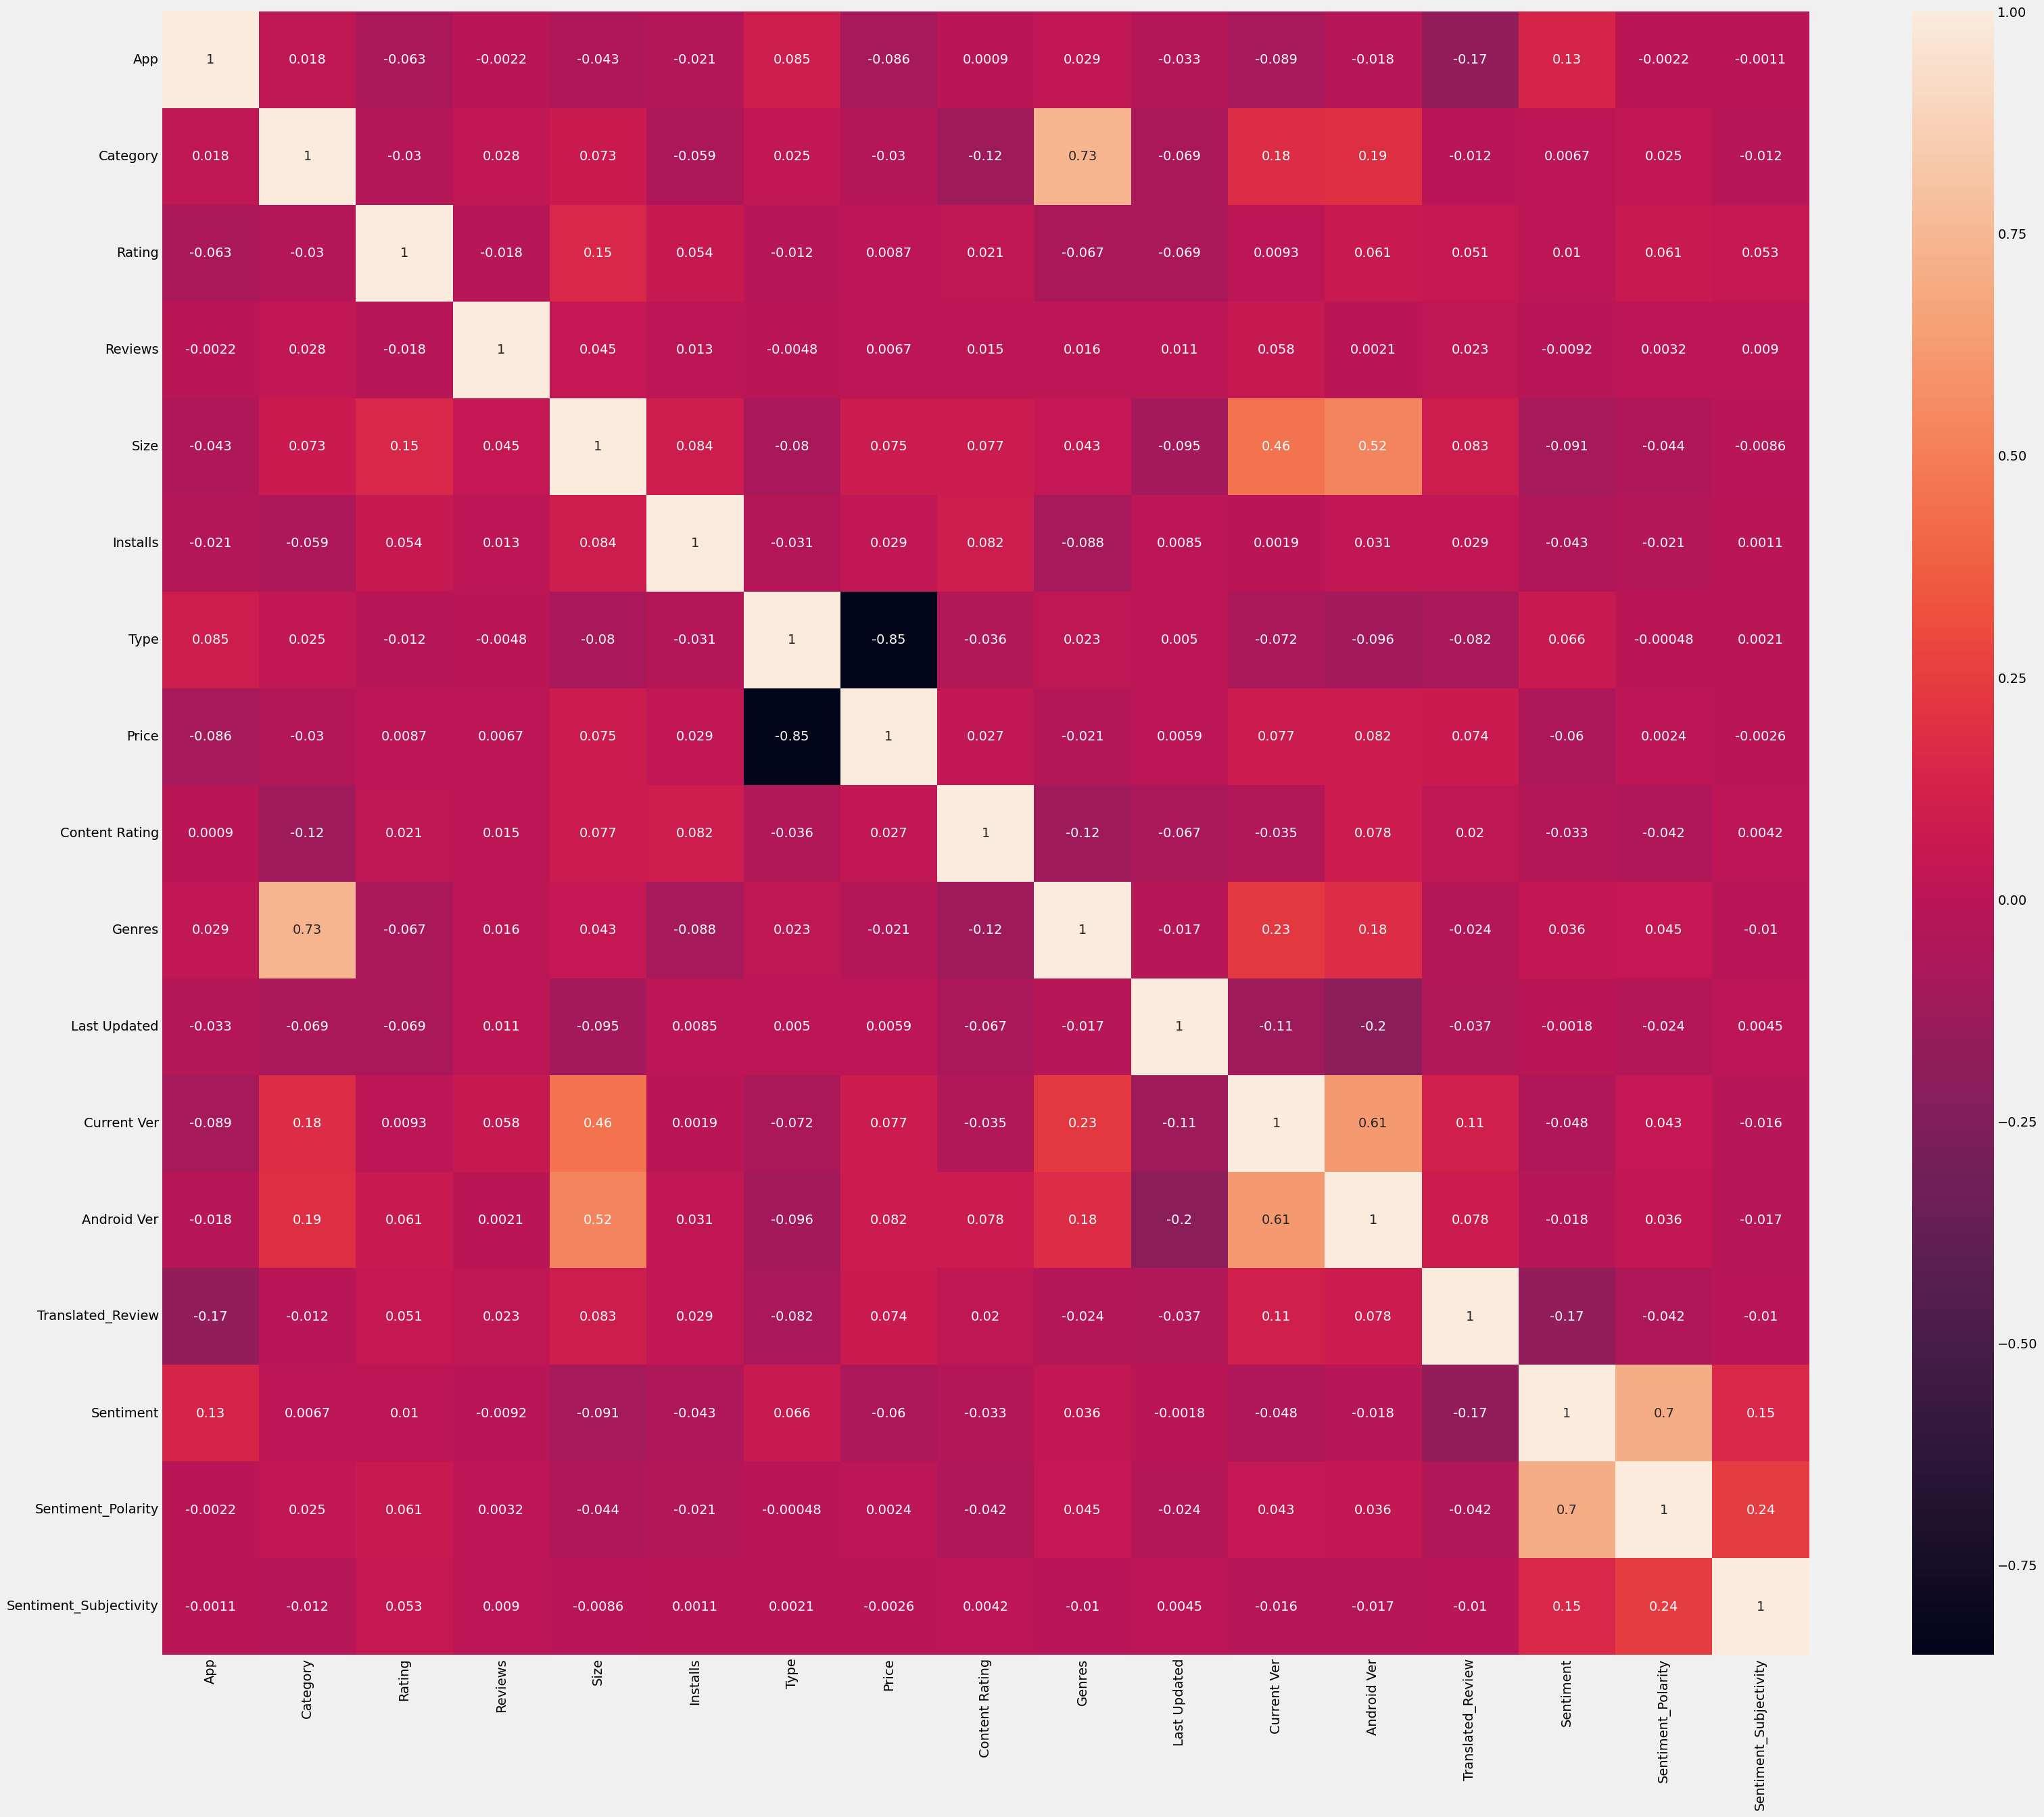

In [50]:
#code snippet uses the heatmap function from the seaborn module to plot a heatmap of the correlation matrix of the dataframe 'merged_df
import seaborn as sns
plt.figure(figsize=(35,30))
sns.heatmap(merged_df.corr(),annot=True)
     